**3B1B: https://www.youtube.com/watch?v=KuXjwB4LzSA**

https://numpy.org/doc/2.0/reference/generated/numpy.convolve.html

In [353]:
import numpy as np
import matplotlib.pyplot as plt

**(1)** Сперва зададим функцию и ядра свёртки **(1а)**, **(1б)**:

In [354]:
def impulse(A, x, T=2):
    return (A if (x % T >= T/2) else -A)

In [355]:
def kernel1(A, x):
    return A * (np.exp(-x**2))

def kernel2(A, x):
    # return np.tanh(x % 1/2)
    return (10*A - x) / A

Теперь выполним свёртку через `np.convolve`:

In [356]:
print(np.convolve((1,2,3), (4,5,6), 'same'))
print(np.convolve((1,2,3), (4,5,6), 'full'))

[13 28 27]
[ 4 13 28 27 18]


100 20 100
[-31.11267296 -32.58419073 -33.77697985 -34.72469088 -35.46276898
 -36.02620266 -36.44779956 -36.75701852 -36.97932337 -37.13597895
 -37.24418634 -29.24418634 -21.32378767 -13.63747215  -6.32602267
   0.49112764   6.7215339   12.30294451  17.20395567  21.42229506
  24.98115959  27.92419512  30.30977335  32.20519542  33.68135161
  34.80821898  35.65141278  36.2698507   36.7144604   37.02777156
  37.24418634  29.24418634  21.32378767  13.63747215   6.32602267
  -0.49112764  -6.7215339  -12.30294451 -17.20395567 -21.42229506
 -24.98115959 -27.92419512 -30.30977335 -32.20519542 -33.68135161
 -34.80821898 -35.65141278 -36.2698507  -36.7144604  -37.02777156
 -37.24418634 -29.24418634 -21.32378767 -13.63747215  -6.32602267
   0.49112764   6.7215339   12.30294451  17.20395567  21.42229506
  24.98115959  27.92419512  30.30977335  32.20519542  33.68135161
  34.80821898  35.65141278  36.2698507   36.7144604   37.02777156
  37.24418634  29.24418634  21.32378767  13.63747215   6.32602267

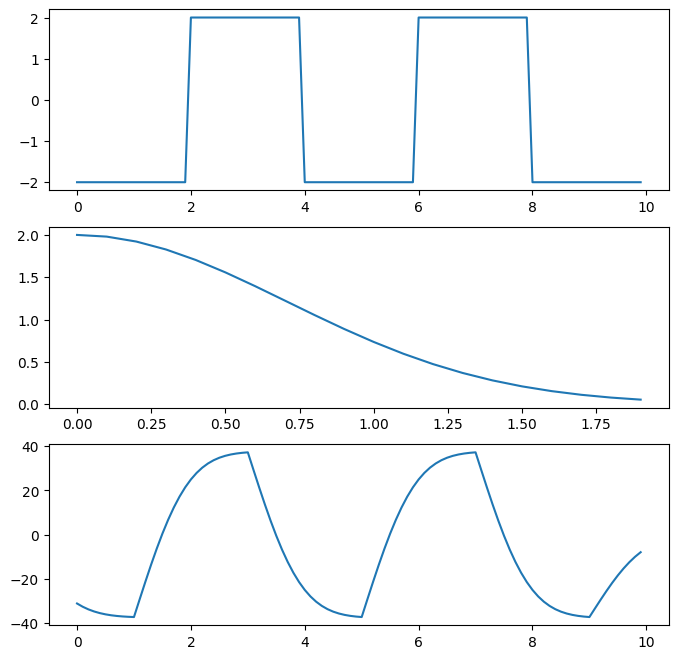

100 20 100
[-195.5 -214.5 -233.4 -252.2 -270.9 -289.5 -308.  -326.4 -344.7 -362.9
 -381.  -341.  -301.2 -261.6 -222.2 -183.  -144.  -105.2  -66.6  -28.2
   10.    48.    85.8  123.4  160.8  198.   235.   271.8  308.4  344.8
  381.   341.   301.2  261.6  222.2  183.   144.   105.2   66.6   28.2
  -10.   -48.   -85.8 -123.4 -160.8 -198.  -235.  -271.8 -308.4 -344.8
 -381.  -341.  -301.2 -261.6 -222.2 -183.  -144.  -105.2  -66.6  -28.2
   10.    48.    85.8  123.4  160.8  198.   235.   271.8  308.4  344.8
  381.   341.   301.2  261.6  222.2  183.   144.   105.2   66.6   28.2
  -10.   -48.   -85.8 -123.4 -160.8 -198.  -235.  -271.8 -308.4 -344.8
 -381.  -361.  -341.1 -321.3 -301.6 -282.  -262.5 -243.1 -223.8 -204.6]


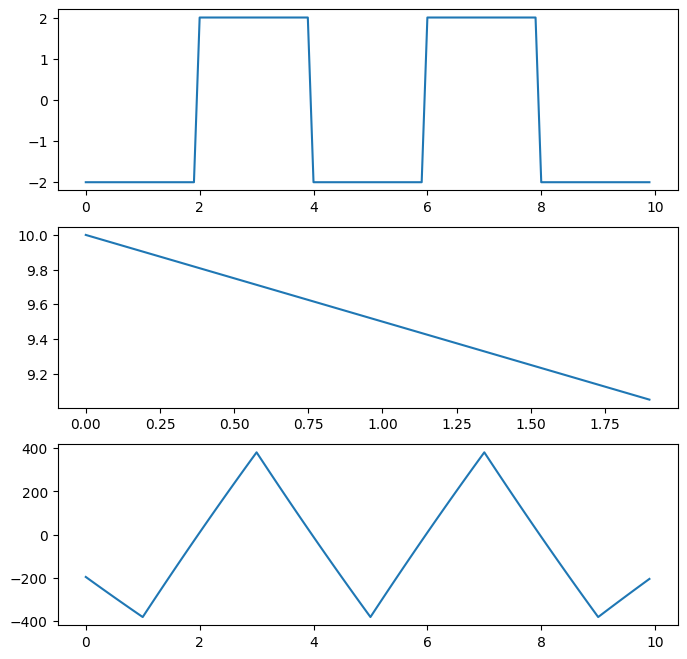

In [357]:
for krnl in [kernel1, kernel2]:
    # Для свёртки не важно, совпадают ли размерности ядра и ф-ии или нет
    time1 = np.arange(0, 10, 0.1)
    time2 = np.arange(0, 2, 0.1)

    values_fun = [impulse(2, a, 4) for a in time1]
    values_krnl = [krnl(2, a) for a in time2]

    values_conv = np.convolve(
        values_fun,
        values_krnl,
        'same' # Возвращаем список такой же размерности (обрезаем неполные операции)
    )

    print(len(values_fun), len(values_krnl), len(values_conv))
    print(values_conv)


    plt.figure(figsize=(8, 8))

    plt.subplot(3, 1, 1)
    plt.plot(time1, values_fun)

    plt.subplot(3, 1, 2)
    plt.plot(time2, values_krnl)

    plt.subplot(3, 1, 3)
    plt.plot(time1, values_conv)

    plt.show()

**(2)** Собственная реализация свёртки (ф. из док. numpy — $(a \star b)_n = \sum_{i=1}^{N}a_i * b_{n-i}$):

In [358]:
def convolute(fun, krnl, cut_edges=True):
    res = []
    seqlen = (len(krnl) + len(fun))

    # if not cut_edges: # (аналог mode=full)
    #     seqlen = (len(krnl) + len(fun))
    # else: # (аналог mode=same)
    #     seqlen = (len(krnl))

    for n in range(seqlen):
        res_elm = 0
        for i in range(len(krnl)):
            if (n-i >= 0) and (n-i < len(fun)):
                # res_elm += fun[i] * krnl[n-i]
                res_elm += fun[n-i] * krnl[i]
        res.append(res_elm)
    
    if len(res) % 2 != 0:
        res.pop()

    if cut_edges: # (аналог mode=same)
        return np.array(
            res[(len(krnl)//2) : (len(fun) + len(krnl)//2)]
        )
    else: # (аналог mode=full)
        return np.array(
            res
        )

In [359]:
print(convolute((1,2,3,4), (4,5,6,7), True))
print(convolute((1,2,3,4), (4,5,6,7), False))

[28 50 52 45]
[ 4 13 28 50 52 45 28  0]


100 20 100
[-32.58419073 -33.77697985 -34.72469088 -35.46276898 -36.02620266
 -36.44779956 -36.75701852 -36.97932337 -37.13597895 -37.24418634
 -29.24418634 -21.32378767 -13.63747215  -6.32602267   0.49112764
   6.7215339   12.30294451  17.20395567  21.42229506  24.98115959
  27.92419512  30.30977335  32.20519542  33.68135161  34.80821898
  35.65141278  36.2698507   36.7144604   37.02777156  37.24418634
  29.24418634  21.32378767  13.63747215   6.32602267  -0.49112764
  -6.7215339  -12.30294451 -17.20395567 -21.42229506 -24.98115959
 -27.92419512 -30.30977335 -32.20519542 -33.68135161 -34.80821898
 -35.65141278 -36.2698507  -36.7144604  -37.02777156 -37.24418634
 -29.24418634 -21.32378767 -13.63747215  -6.32602267   0.49112764
   6.7215339   12.30294451  17.20395567  21.42229506  24.98115959
  27.92419512  30.30977335  32.20519542  33.68135161  34.80821898
  35.65141278  36.2698507   36.7144604   37.02777156  37.24418634
  29.24418634  21.32378767  13.63747215   6.32602267  -0.49112764

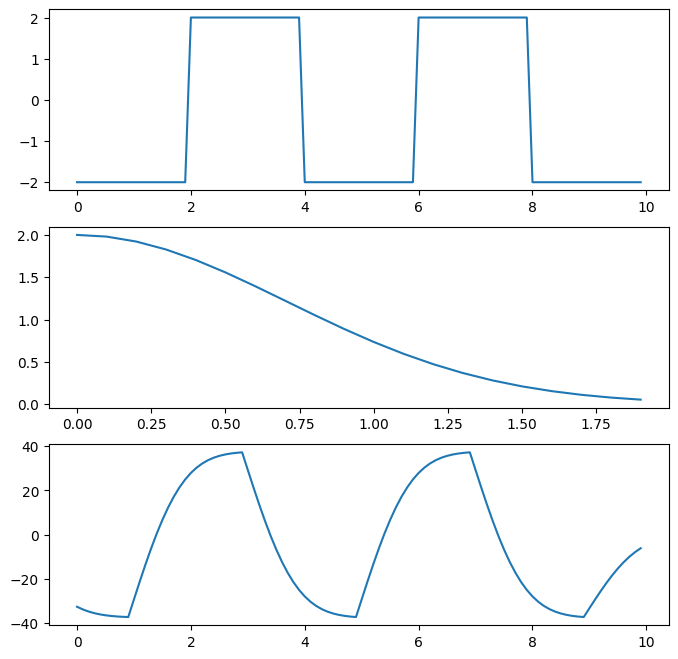

100 20 100
[-214.5 -233.4 -252.2 -270.9 -289.5 -308.  -326.4 -344.7 -362.9 -381.
 -341.  -301.2 -261.6 -222.2 -183.  -144.  -105.2  -66.6  -28.2   10.
   48.    85.8  123.4  160.8  198.   235.   271.8  308.4  344.8  381.
  341.   301.2  261.6  222.2  183.   144.   105.2   66.6   28.2  -10.
  -48.   -85.8 -123.4 -160.8 -198.  -235.  -271.8 -308.4 -344.8 -381.
 -341.  -301.2 -261.6 -222.2 -183.  -144.  -105.2  -66.6  -28.2   10.
   48.    85.8  123.4  160.8  198.   235.   271.8  308.4  344.8  381.
  341.   301.2  261.6  222.2  183.   144.   105.2   66.6   28.2  -10.
  -48.   -85.8 -123.4 -160.8 -198.  -235.  -271.8 -308.4 -344.8 -381.
 -361.  -341.1 -321.3 -301.6 -282.  -262.5 -243.1 -223.8 -204.6 -185.5]


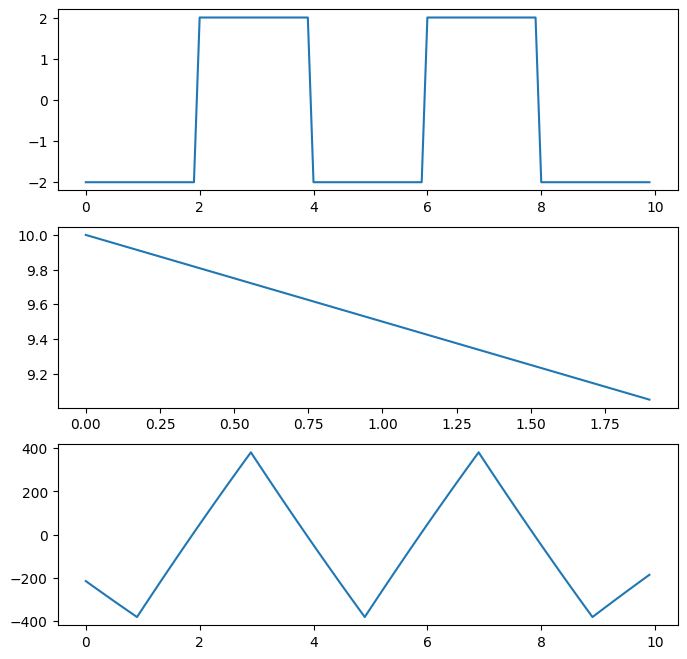

In [360]:
for krnl in [kernel1, kernel2]:
    # Для свёртки не важно, совпадают ли размерности ядра и ф-ии или нет
    time1 = np.arange(0, 10, 0.1)
    time2 = np.arange(0, 2, 0.1)

    values_fun = [impulse(2, a, 4) for a in time1]
    values_krnl = [krnl(2, a) for a in time2]

    values_conv = convolute(
        values_fun,
        values_krnl,
        True # Возвращаем список такой же размерности (обрезаем неполные операции)
    )

    print(len(values_fun), len(values_krnl), len(values_conv))
    print(values_conv)


    plt.figure(figsize=(8, 8))

    plt.subplot(3, 1, 1)
    plt.plot(time1, values_fun)

    plt.subplot(3, 1, 2)
    plt.plot(time2, values_krnl)
    # plt.plot(time1, np.pad(values_krnl, (0, len(time2)-len(time1)), 'constant'))

    plt.subplot(3, 1, 3)
    plt.plot(time1, values_conv)

    plt.show()

**(3)** Теорема о свёртке — **свёртка сигнала во временной области эквивалентна умножению свёртки на ядро в частотной области**

In [361]:
def some_signal(A, t):
    return np.arctan(t % A)

def some_kernel(A, x):
    return (x)**2 / A

In [362]:
time = np.arange(-20, 20, 0.1)

signal_values = [some_signal(2, a) for a in time]

signal_frequencies = np.fft.fftfreq(len(signal_values), 0.1)

kernel_values = [some_kernel(200, a) for a in time]

Преобразования во временном представлении (сигнал -> свёртка -> FFT свёртки):

In [363]:
# ВАЖНО -- используем полный результат свёртки, без обреза краёв!
# conv_values = convolute(signal_values, kernel_values)
conv_values = convolute(signal_values, kernel_values, False)

time_conv = np.arange(-(len(conv_values) // 2), len(conv_values) // 2)
print(len(time), len(time_conv))

conv_fft = np.fft.fft(conv_values, n=len(conv_values))

400 800


Преобразования в частотном представлении (FFT сигнала и ядра -> перемножение -> IFFT перемножения):

In [364]:
signal_fft = np.fft.fft(signal_values, n=len(conv_values))
kernel_fft = np.fft.fft(kernel_values, n=len(conv_values))

multiply = np.multiply(signal_fft, kernel_fft)

multiply_ifft = np.fft.ifft(multiply)

Графики:

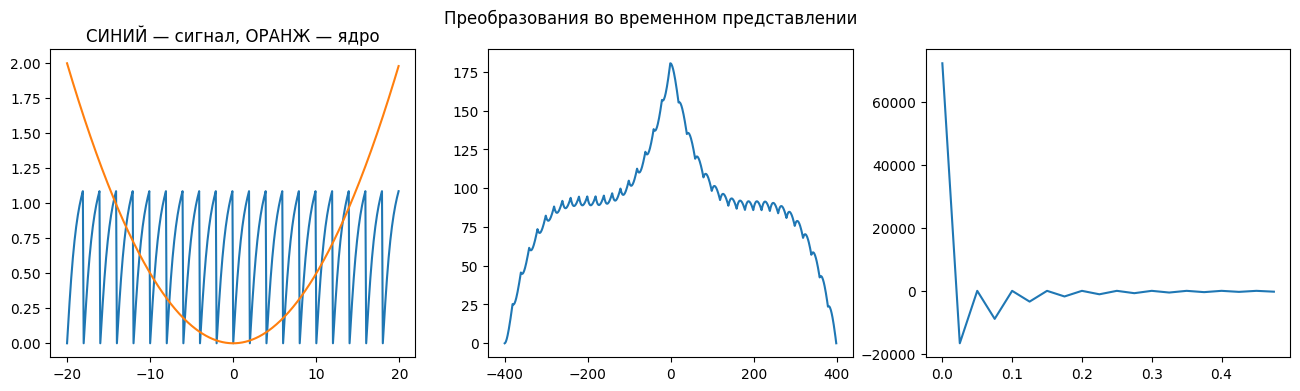

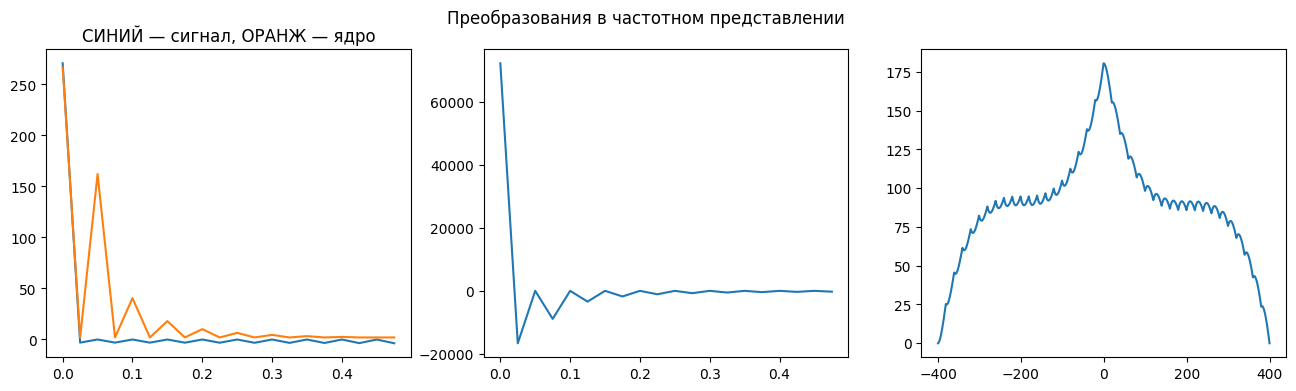

In [365]:
plt.figure(figsize=(16, 4))
plt.suptitle('Преобразования во временном представлении')

plt.subplot(1, 3, 1)
plt.plot(time, signal_values)
plt.plot(time, kernel_values)
plt.title('СИНИЙ — сигнал, ОРАНЖ — ядро')

plt.subplot(1, 3, 2)
plt.plot(time_conv, conv_values)

plt.subplot(1, 3, 3)
plt.plot(signal_frequencies[0:len(signal_frequencies)//20], conv_fft[0:len(signal_frequencies)//20])

plt.show()


plt.figure(figsize=(16, 4))
plt.suptitle('Преобразования в частотном представлении')

plt.subplot(1, 3, 1)
plt.plot(signal_frequencies[0:len(signal_frequencies)//20], signal_fft[0:len(signal_frequencies)//20])
plt.plot(signal_frequencies[0:len(signal_frequencies)//20], kernel_fft[0:len(signal_frequencies)//20])
plt.title('СИНИЙ — сигнал, ОРАНЖ — ядро')

plt.subplot(1, 3, 2)
plt.plot(signal_frequencies[0:len(signal_frequencies)//20], multiply[0:len(signal_frequencies)//20])

plt.subplot(1, 3, 3)
plt.plot(time_conv, multiply_ifft)

plt.show()

**(4)** Один из случаев использования свёртки — использования ядра Гаусса для сглаживания/блюра, например, картинок или, как у нас, сигналов:

- `h` — частота,
- `p` — пиковая частота (частота, на которой лежит центр норм. расп-я),
- `w` — ["полная ширина на половине максимума"](https://www.google.com/search?sca_esv=180af7e8d3421ee1&hl=ru&q=FWHM&udm=2&fbs=AEQNm0Bp5umSHxKusJ5rDc5tD7bXQFyBu2lrNDBZ00d9UxRuTefA4_X-0iyIEtCZvR7pjbJboViJ9XAxDq-LmnZlh_Fr31K19XJNO3aD5SzMq8bh1422xut68nqLNC_3uCNOknBqWs0iY2iUhNlZ6PpSsZvCBSEolRAHqLwCSOdbxuRhVWoUEMRDOERLYjx5Mh0upRaFN0Ze7HBcOumCFWvWd8p6JDk2Zg&sa=X&ved=2ahUKEwi3-Mru8o-JAxUXUUEAHfUKKagQtKgLegQIERAB#vhid=UI-PQcswKmo_lM&vssid=mosaic)

In [366]:
def gauss(h, p, w):
    s = w * (2 * np.pi - 1) / (4 * np.pi)
    g = np.exp(-5 *
        ((h - p) / s)**2
    )
    return g

In [367]:
np.random.seed(10)

test_time = np.arange(0, 10, 0.1)
test_values = [np.random.normal(0, 1) for a in test_time]

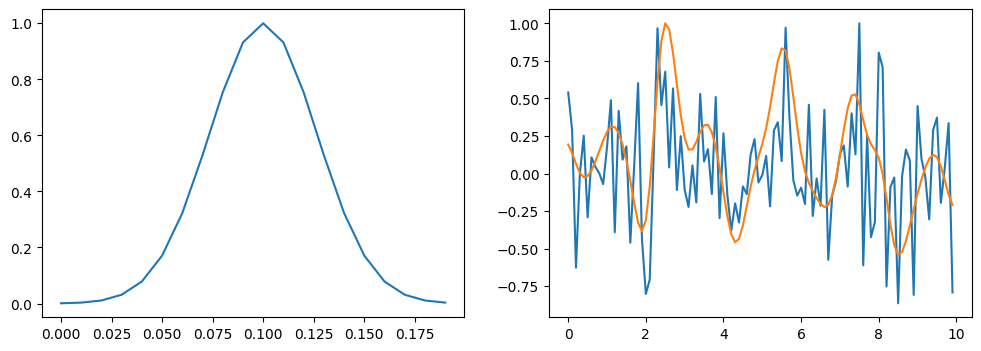

In [368]:
c = 0.1
gauss_time = np.arange(0, c*2, 0.01)
gauss_values = [gauss(a, c, c*2) for a in gauss_time]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(gauss_time, gauss_values)

plt.subplot(1, 2, 2)
plt.plot(
    test_time,
    np.asarray(test_values) / max(test_values)
)
plt.plot(
    test_time,
    convolute(test_values, gauss_values) / max(convolute(test_values, gauss_values))
)

plt.show()

**(5)** Применяем ядро в качестве фильтра в частотном представлении:

In [369]:
c = 0.5
gauss_time = np.arange(0, c*2, 0.01)
gauss_values = [gauss(a, c, c*2) for a in gauss_time]

In [370]:
time = np.arange(-10, 10, 0.05)
signal_values = [some_signal(2, a) for a in time]
signal_fft = np.fft.fft(signal_values)
signal_frequencies = np.fft.fftfreq(len(time), 0.05)

signal_fft_filtered_gauss = np.multiply(
    signal_fft,
    np.pad(gauss_values, (0, (len(signal_fft)-len(gauss_values))))
)
signal_filtered_gauss_ifft = np.fft.ifft(signal_fft_filtered_gauss)

In [371]:
def compare_before_after(original, original_fft, filtered, filtered_fft, time, freq):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(
        freq[0:len(freq)//2],
        np.abs(original_fft)[0:len(freq)//2]
    )
    plt.plot(
        freq[0:len(freq)//2],
        np.abs(filtered_fft)[0:len(freq)//2]
    )

    plt.subplot(1, 2, 2)
    plt.plot(
        time,
        original
    )
    plt.plot(
        time,
        filtered
    )

    plt.show()

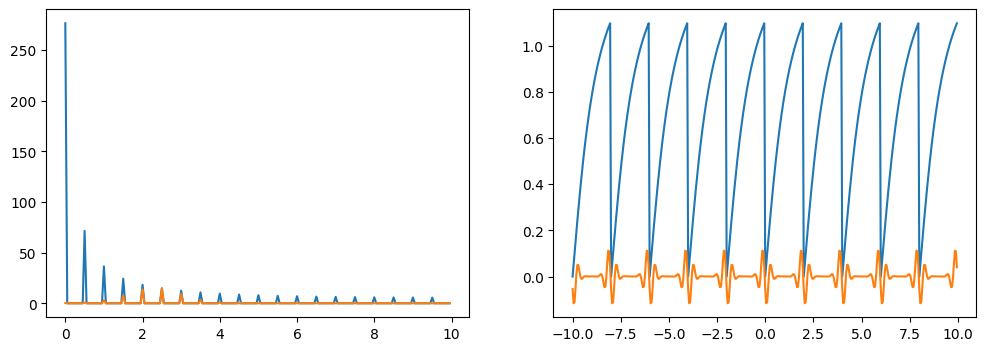

In [372]:
compare_before_after(signal_values, signal_fft, signal_filtered_gauss_ifft, signal_fft_filtered_gauss, time, signal_frequencies)

"Убедиться, что результаты совпадают" — результаты обработки ф-ии в различных представлениях?

Для этого можно снова использовать теорему свёртки:

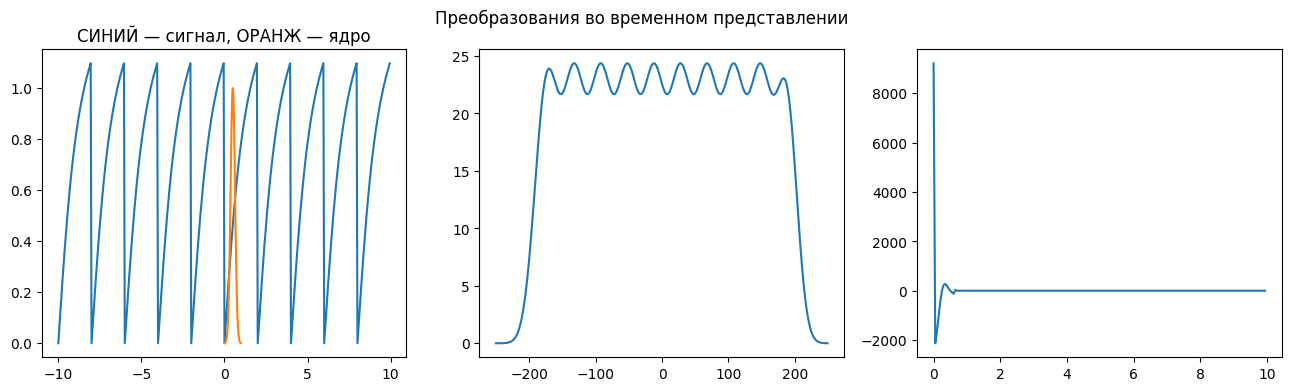

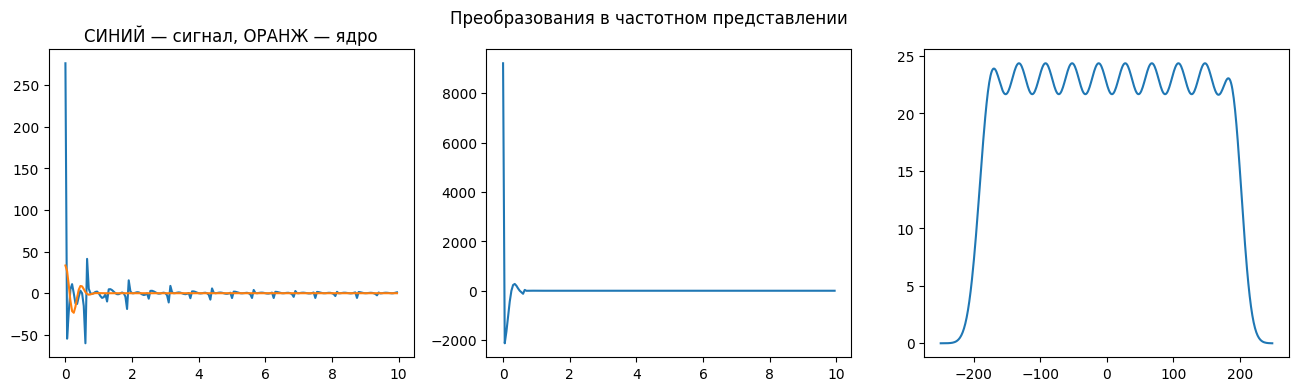

In [373]:
conv_values = convolute(signal_values, gauss_values, False)

time_conv = np.arange(-(len(conv_values) // 2), len(conv_values) // 2)

conv_fft = np.fft.fft(conv_values, n=len(conv_values))


signal_fft = np.fft.fft(signal_values, n=len(conv_values))
kernel_fft = np.fft.fft(gauss_values, n=len(conv_values))

multiply = np.multiply(signal_fft, kernel_fft)

multiply_ifft = np.fft.ifft(multiply)


plt.figure(figsize=(16, 4))
plt.suptitle('Преобразования во временном представлении')

plt.subplot(1, 3, 1)
plt.plot(time, signal_values)
plt.plot(gauss_time, gauss_values)
plt.title('СИНИЙ — сигнал, ОРАНЖ — ядро')

plt.subplot(1, 3, 2)
plt.plot(time_conv, conv_values)

plt.subplot(1, 3, 3)
plt.plot(signal_frequencies[0:len(signal_frequencies)//2], conv_fft[0:len(signal_frequencies)//2])

plt.show()


plt.figure(figsize=(16, 4))
plt.suptitle('Преобразования в частотном представлении')

plt.subplot(1, 3, 1)
plt.plot(signal_frequencies[0:len(signal_frequencies)//2], signal_fft[0:len(signal_frequencies)//2])
plt.plot(signal_frequencies[0:len(signal_frequencies)//2], kernel_fft[0:len(signal_frequencies)//2])
plt.title('СИНИЙ — сигнал, ОРАНЖ — ядро')

plt.subplot(1, 3, 2)
plt.plot(signal_frequencies[0:len(signal_frequencies)//2], multiply[0:len(signal_frequencies)//2])

plt.subplot(1, 3, 3)
plt.plot(time_conv, multiply_ifft)

plt.show()

Теперь идея в том, чтобы через ядро Гаусса "выразить" пару фильтров из прошлых лаб —

**(5а)** Узкопопосный фильтр и **(5б)** Фильтр нижних частот:

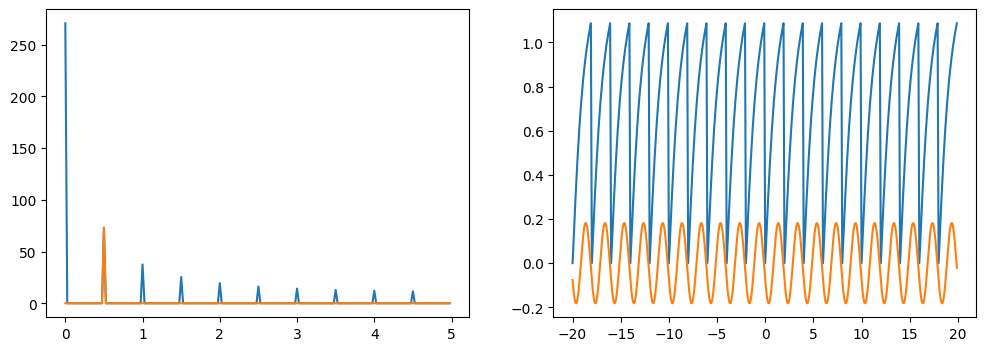

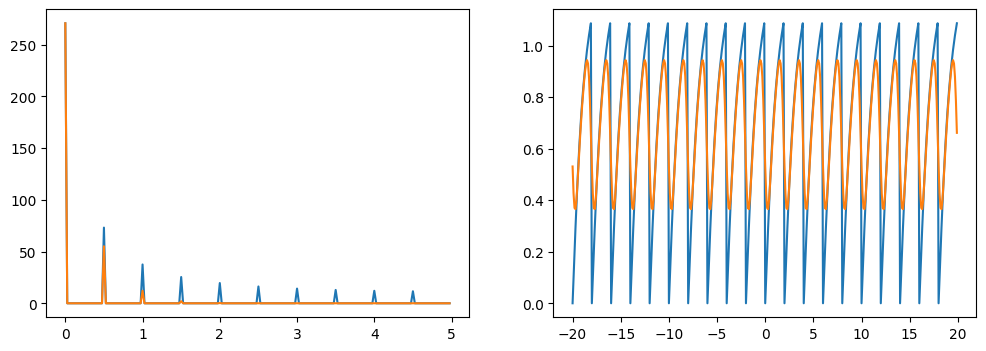

In [374]:
time = np.arange(-20, 20, 0.1)
signal_values = [some_signal(2, a) for a in time]
signal_fft = np.fft.fft(signal_values)
signal_frequencies = np.fft.fftfreq(len(time), 0.1)

gauss_f1_values = gauss(signal_frequencies, 0.5, 0.5)
signal_filtered_gauss_f1_fft = np.multiply(signal_fft, gauss_f1_values)
signal_filtered_gauss_f1 = np.fft.ifft(signal_filtered_gauss_f1_fft)

gauss_f2_values = gauss(signal_frequencies, 0, 5)
signal_filtered_gauss_f2_fft = np.multiply(signal_fft, gauss_f2_values)
signal_filtered_gauss_f2 = np.fft.ifft(signal_filtered_gauss_f2_fft)

compare_before_after(signal_values, signal_fft, signal_filtered_gauss_f1, signal_filtered_gauss_f1_fft, time, signal_frequencies)
compare_before_after(signal_values, signal_fft, signal_filtered_gauss_f2, signal_filtered_gauss_f2_fft, time, signal_frequencies)

**(6)** [Oкно Планка:](https://www.youtube.com/watch?v=8DOOphWeRf4)
- `N` — длина фильтра,
- `k` — частота ($1,\dots,N-1$),
- `epsilon` — чем выше тем плавнее ($0.0,\dots,0.5$)

<!-- # TODO: ЗДЕСЬ ГДЕ-ТО ОШИБКА, НАДО НАЙТИ -->

In [375]:
def planck(t, N, epsilon):
    if (t < 0) or (t > (N-1)):
        print(f'ЗНАЧЕНИЕ t (={t}) ВНЕ ДИАПАЗОНА (0, {N-1})!')
    if (epsilon < 0) or (epsilon > 0.5):
        print(f'ЗНАЧЕНИЕ EPSILON (={epsilon}) ВНЕ ДИАПАЗОНА (0.3, 0.5)!')

    if (t == 0) or (t == N-1):
        return 0

    if (0 < t) and (t < epsilon*(N-1)):
        planck_border_left = (
            epsilon * (N-1) * (1/t + 1/(t - epsilon*(N-1)))
        )
        return (1 / (np.exp(planck_border_left) + 1))

    elif (epsilon*(N-1) <= t) and (t <= (1-epsilon)*(N-1)):
        return 1
    
    elif ((1-epsilon)*(N-1) < t) and (t < (N-1)):
        planck_border_right = (
            epsilon * (N-1) * (1/(N-1-t) + 1/((1-epsilon)*(N-1) - t))
        )
        return (1 / (np.exp(planck_border_right) + 1))

    else:
        print(f'ОШИБКА ВЫЧИСЛЕНИЯ ДИАПАЗОНА! ВОЗВРАЩАЮ 0 КАК ФОЛБЭК.')
        return 0

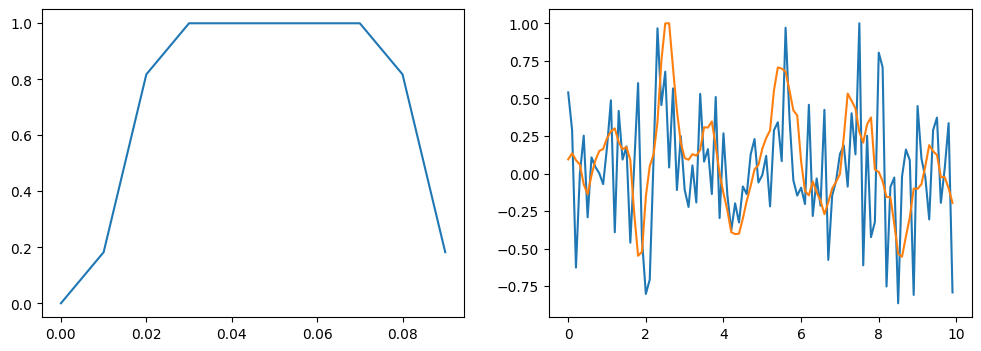

In [376]:
c = 0.1
planck_time = np.arange(0, c, 0.01)
planck_values = [planck(a, c+1, 0.3) for a in planck_time]


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(planck_time, planck_values)

plt.subplot(1, 2, 2)
plt.plot(
    test_time,
    np.asarray(test_values) / max(test_values)
)
plt.plot(
    test_time,
    convolute(test_values, planck_values) / max(convolute(test_values, planck_values))
)

plt.show()

**(7)** Сравнить результат фильтрации зашумленного сигнала при использовании ядра
Гаусса и окна Планка.

In [377]:
def cool_triangles(A, t):
    seg = (t+2)%6

    if (seg >= 0) and (seg <= 2):
        return A * (2-seg) / 2

    elif (seg >= 3) and (seg <= 5):
        return A * (seg-3) / 2

    else:
        return 0

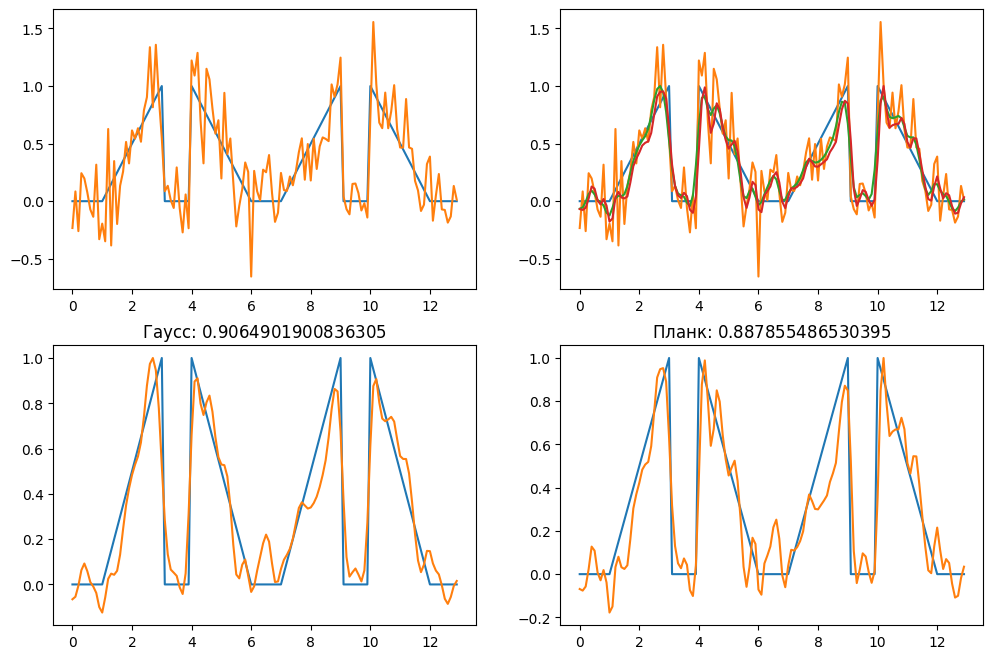

In [320]:
time = np.arange(0, 13, 0.1)
values = [cool_triangles(20, a) for a in time]
values_noisy = values + np.random.normal(0, 5, len(time))

c = 0.05
gauss_time = np.arange(0, c*2, 0.01)
gauss_krnl = [gauss(a, c, c*2) for a in gauss_time]
values_gauss = convolute(values_noisy, gauss_krnl)
err_gasss = np.abs(np.subtract(values_gauss / max(values_gauss), values / max(values)))

c = 0.05
planck_time = np.arange(0, c, 0.01)
planck_krnl = [planck(a, c+1, 0.5) for a in planck_time]
values_planck = convolute(values_noisy, planck_krnl)
err_planck = np.abs(np.subtract(values_planck / max(values_planck), values / max(values)))


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, values / max(values))
plt.plot(time, values_noisy / max(values))

plt.subplot(2, 2, 2)
plt.plot(time, values / max(values))
plt.plot(time, values_noisy / max(values))
plt.plot(time, values_gauss / max(values_gauss))
plt.plot(time, values_planck / max(values_planck))

plt.subplot(2, 2, 3)
plt.plot(time, values / max(values))
plt.plot(time, values_gauss / max(values_gauss))
plt.title(f'Гаусс: ${1 - np.average(err_gasss)}$')

plt.subplot(2, 2, 4)
plt.plot(time, values / max(values))
plt.plot(time, values_planck / max(values_planck))
plt.title(f'Планк: ${1 - np.average(err_planck)}$')

plt.show()

Вывод — в целом, восстановление зашумлённой функции гауссом и планком даёт примерно одинаковую точность восстановления, однако первый способ имеет меньшую чувствительность к резким колебаниям, сглаживая их сильнее, чем второй, что заметно на двух нижних графиках.